## 🛠 03. Computer vision & convolutional neural networks in TensorFlow Exercises

1. Spend 20-minutes reading and interacting with the CNN explainer website.
* What are the key terms? e.g. explain convolution in your own words, pooling in your own words

2. Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes.
* What is the kernel size?
* What is the stride?
* How could you adjust each of these in TensorFlow code?
3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.
4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

### 3.3 Build our own CNN image classifier

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [28]:
# Setting the paths
test_set = '/content/drive/MyDrive/Tensorflow_Certificate/Covid19-dataset/test/'
train_set = '/content/drive/MyDrive/Tensorflow_Certificate/Covid19-dataset/train/'

In [30]:
!wget https://drive.google.com/drive/folders/1ft34tV8e3WQjFpTa4LWONSMzfm4MURAI?usp=share_link

--2023-01-30 15:51:44--  https://drive.google.com/drive/folders/1ft34tV8e3WQjFpTa4LWONSMzfm4MURAI?usp=share_link
Resolving drive.google.com (drive.google.com)... 172.253.118.102, 172.253.118.139, 172.253.118.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.118.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1ft34tV8e3WQjFpTa4LWONSMzfm4MURAI?usp=share_link’

1ft34tV8e3WQjFpTa4L     [  <=>               ] 242.33K   913KB/s    in 0.3s    

2023-01-30 15:51:46 (913 KB/s) - ‘1ft34tV8e3WQjFpTa4LWONSMzfm4MURAI?usp=share_link’ saved [248144]



In [34]:
# Inspect Data
!ls /content/Covid19/test/negative

0101.jpeg  0102.jpeg  0103.jpeg  0105.jpeg  0106.jpeg


In [38]:
!ls /content/Covid19/train/negative

010.jpeg  02.jpeg  04.jpeg  06.jpeg  08.jpeg
01.jpeg   03.jpeg  05.jpeg  07.jpeg  09.jpeg


In [59]:
# removing unwanted file
!rmdir /content/Covid19/train/.ipynb_checkpoints
!rmdir /content/Covid19/test/.ipynb_checkpoints

rmdir: failed to remove '/content/Covid19/train/.ipynb_checkpoints': No such file or directory


In [60]:
import os
# Walk through covid19 directory and list number of files
for dirpath, dirname,filenames in os.walk('Covid19'):
  print(f'There are {len(dirname)} directories and {len(filenames)} images in {dirpath}')

There are 3 directories and 0 images in Covid19
There are 2 directories and 0 images in Covid19/train
There are 0 directories and 10 images in Covid19/train/positive
There are 0 directories and 10 images in Covid19/train/negative
There are 2 directories and 0 images in Covid19/test
There are 0 directories and 5 images in Covid19/test/positive
There are 0 directories and 5 images in Covid19/test/negative
There are 0 directories and 0 images in Covid19/.ipynb_checkpoints


In [61]:
# Get the classnames programmatically 
import pathlib
import numpy as np
data_dir = pathlib.Path('Covid19/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from sub directories
print(class_names)

['negative' 'positive']


#### Visualizing data

In [54]:
# Let's visualize our iamges
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img

['012.jpeg']
Image shape: (2048, 2500, 3)


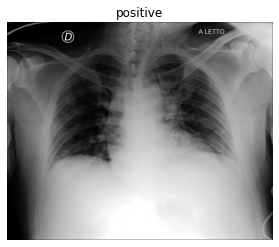

In [55]:
img = view_random_image(target_dir = 'Covid19/train/',
                  target_class='positive')

#### Creating Data Generators and Preprocessing

In [63]:
# Create train and test data generators and rescale the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (Normalize)
train_datagen  = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

In [62]:
# Setup paths to our data directories
train_dir = '/content/Covid19/train'
test_dir = '/content/Covid19/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [64]:
# Get a sample of train data batch
images,labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images),len(labels)

(20, 20)

In [65]:
# How many batches are there?
len(train_data)

1

In [67]:
images[0],labels[0]

(array([[[0.08235294, 0.08235294, 0.08235294],
         [0.08627451, 0.08627451, 0.08627451],
         [0.09803922, 0.09803922, 0.09803922],
         ...,
         [0.427451  , 0.427451  , 0.427451  ],
         [0.38431376, 0.38431376, 0.38431376],
         [0.3529412 , 0.3529412 , 0.3529412 ]],
 
        [[0.08627451, 0.08627451, 0.08627451],
         [0.09411766, 0.09411766, 0.09411766],
         [0.09019608, 0.09019608, 0.09019608],
         ...,
         [0.3921569 , 0.3921569 , 0.3921569 ],
         [0.36078432, 0.36078432, 0.36078432],
         [0.30980393, 0.30980393, 0.30980393]],
 
        [[0.07843138, 0.07843138, 0.07843138],
         [0.08235294, 0.08235294, 0.08235294],
         [0.10588236, 0.10588236, 0.10588236],
         ...,
         [0.38823533, 0.38823533, 0.38823533],
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.3372549 , 0.3372549 , 0.3372549 ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [69]:
# Check how many unique classes
np.unique(labels)

array([0., 1.], dtype=float32)

#### Model 0: Baseline

In [70]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [82]:
# Build the model
model_0 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

**Question:** How do we interprete that the sigmoid function output 
corresponds to the labels? 

In [83]:
# Compile the model
model_0.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

In [84]:
# Fit the model
history_0 = model_0.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.7121 - accuracy: 0.4000 - val_loss: 0.6859 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6610 - val_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.6640 - accuracy: 0.6500 - val_loss: 0.6472 - val_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6457 - accuracy: 0.7500 - val_loss: 0.6319 - val_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.6272 - accuracy: 0.7000 - val_loss: 0.6075 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.6001 - accuracy: 0.9500 - val_loss: 0.5788 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5695 - accuracy: 0.9500 - val_loss: 0.5521 - val_accuracy: 0.8000
Epoch 8/10
1/1 [=========================

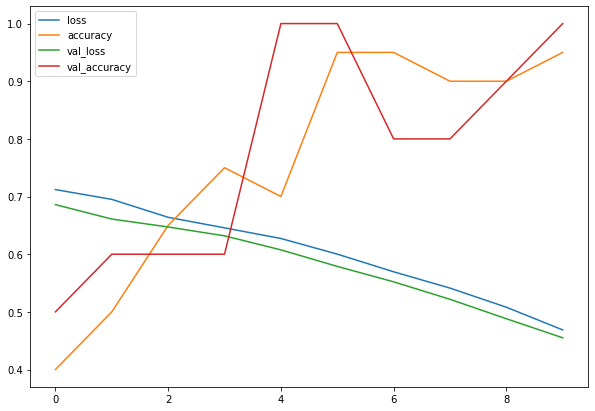

In [85]:
# Evaluate
import pandas as pd
pd.DataFrame(history_0.history).plot(figsize=(10,7));

In [86]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs,loss,label='Training Loss')
  plt.plot(epochs,val_loss,label='Val Loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='Training Accuracy')
  plt.plot(epochs,val_accuracy,label='Val Accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

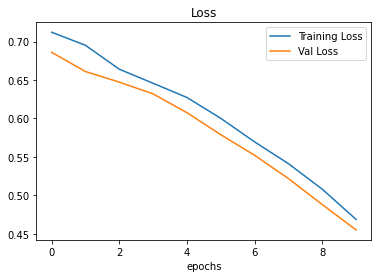

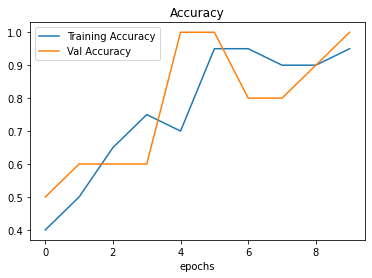

In [87]:
plot_loss_curves(history_0)

#### Model 1: Data Augmentation

In [88]:
# Create ImageDataGenerator training instance with data augmentatin
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [96]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

# Create non-augmented test data
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             )

Augmented training data
Found 20 images belonging to 2 classes.
Non-augmented training data
Found 20 images belonging to 2 classes.
Non-augmented test data
Found 10 images belonging to 2 classes.


In [97]:
# Get sample data batches
images, labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()

Showing image number : 9


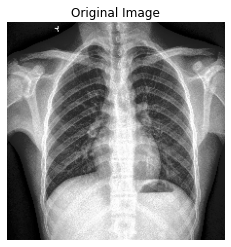

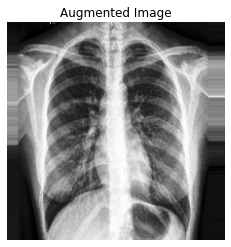

In [98]:
# Show original image and augmented image
import random
random_number = random.randint(0,32)
print(f'Showing image number : {random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False);
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.axis(False);

In [103]:
# Build the model
model_1 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(),
    Conv2D(10,3),
    MaxPool2D(),
    Conv2D(10,3),
    MaxPool2D(),
    Conv2D(10,3),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(learning_rate=0.01),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.7966 - accuracy: 0.5000 - val_loss: 1.6022 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.6461 - accuracy: 0.5000 - val_loss: 4.1312 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 3.8201 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.6973 - accuracy: 0.5000 - val_loss: 1.4664 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 1.4791 - accuracy: 0.5000 - val_loss: 0.7969 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 0.8136 - accuracy: 0.5000 - val_loss: 0.7413 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.7471 - accuracy: 0.5000 - val_loss: 0.7754 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=========================

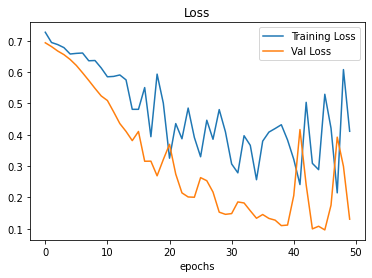

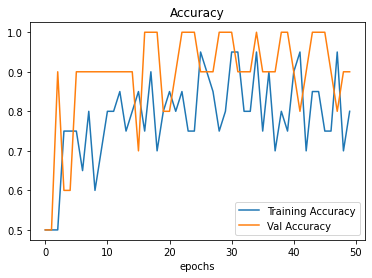

In [101]:
# Check the curves
plot_loss_curves(history_1)

### Predict

In [104]:
# classes
class_names

array(['negative', 'positive'], dtype='<U8')

In [105]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  #Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # Normalize
  img = img/255.

  return img

In [107]:
# Load in and preprocess our custom image
positive_image = load_and_prep_image('/content/Covid19/test/positive/0100.jpeg')
positive_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[1.        , 1.        , 1.        ],
        [0.9896476 , 0.9896476 , 0.9896476 ],
        [0.982984  , 0.982984  , 0.982984  ],
        ...,
        [0.8512009 , 0.8512009 , 0.8512009 ],
        [0.85388654, 0.85388654, 0.85388654],
        [0.8746236 , 0.8746236 , 0.8746236 ]],

       [[0.31490704, 0.31490704, 0.31490704],
        [0.24961045, 0.24961045, 0.24961045],
        [0.21356396, 0.21356396, 0.21356396],
        ...,
        [0.02762604, 0.02762604, 0.02762604],
        [0.02501749, 0.02501749, 0.02501749],
        [0.03120622, 0.03120622, 0.03120622]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.02352941, 0.02352941, 0.02352941],
        [0.02

In [108]:
pred_1 = model_1.predict(tf.expand_dims(positive_image,axis=0))
pred_1

1/1 [==============================] - 0s 276ms/step


array([[0.48066896]], dtype=float32)

In [109]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred_1))] 
pred_class

'negative'

In [110]:
def pred_and_plot(model,filename,class_names=class_names):
  
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 37ms/step


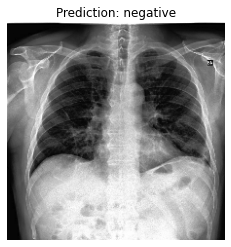

In [111]:
# Test our model on custom image
pred_and_plot(model_1,'/content/Covid19/test/positive/0100.jpeg')